<a href="https://colab.research.google.com/github/ThoDC/Covid_19-Survey/blob/main/Insights_of_Covid_19_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Giới thiệu Project 
**Coronavirus** là một họ vi-rút có thể gây bệnh, có thể khiến *cảm lạnh thông thường* và *ho* trở bệnh nặng hơn. **Hội chứng hô hấp Trung Đông (MERS-CoV)** và **Hội chứng hô hấp cấp tính nặng (SARS-CoV)** là những trường hợp nghiêm trọng mà thế giới phải đối mặt.<br> **SARS-CoV-2 (n-coronavirus)** SARS-CoV-2 (n-coronavirus) là loại virus mới thuộc họ coronavirus, *được phát hiện* lần đầu vào năm 2019, chưa được xác định ở người trước đây.

Nó là một loại vi-rút *truyền nhiễm* bắt đầu từ **Vũ Hán** vào **tháng 12 năm 2019**. Sau này, nó được **WHO** tuyên bố là **đại dịch** do tốc độ lây lan cao trên toàn thế giới. Hiện tại (ngày 10 tháng 6 năm 2020), đại dịch này đã khiến hơn *500 nghìn* người chết trên toàn cầu.<br>

Đại dịch đang lan rộng trên toàn thế giới; điều quan trọng bây giờ là hiểu rõ hơn về sự lây lan này. Notebook này đã nỗ lực phân tích dữ liệu tích lũy của các trường hợp đã xác nhận, trường hợp tử vong và hồi phục theo thời gian.
     <br>
   <font face = "Verdana" size ="1">
    <center><img src='https://www.statnews.com/wp-content/uploads/2020/02/Coronavirus-CDC-645x645.jpg'></center> 
    </font>
 <center><font face = "Verdana" size ="4"> Keep strong, world! Stay safe and healthy. </font><center>

<br>

# 2. Download và Cài đặt Prerequisite
**pycountry_convert**: Sử dụng dữ liệu quốc gia lấy từ wikipedia, thư viện này cung cấp các hàm chuyển đổi giữa tên quốc gia ISO, mã quốc gia và tên lục địa.

**folium, seaborn, plotly**: Một số thư viện trực quan hóa trong Python.

Bỏ chú thích và cài đặt một số thư viện nếu bạn chưa cài đặt chúng. Nếu không, hãy tiếp tục.

In [ ]:
#!pip install pycountry_convert 
#!pip install folium
#!pip install seaborn
#!pip install plotly

In [ ]:
#Import thư viện
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker 
import pycountry_convert as pc
from pycountry_convert import country_mappings as cm
import folium
from datetime import datetime, timedelta,date
from scipy.interpolate import make_interp_spline, BSpline
import plotly.express as px
import plotly.graph_objs as go
import json
import plotly.offline as py
import seaborn as sns
plt.style.use('fivethirtyeight')

# 3. Download tập dữ liệu

Tập dữ liệu này được cập nhật hàng ngày bởi Johns Hopkins CSSE.

In [ ]:
# Dữ liệu toàn cầu

confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [ ]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/15/22,7/16/22,7/17/22,7/18/22,7/19/22,7/20/22,7/21/22,7/22/22,7/23/22,7/24/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,183407,183445,183572,183687,183908,184038,184224,184360,184473,184587
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,293917,293917,293917,293917,293917,293917,293917,293917,293917,293917
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,266392,266424,266445,266487,266542,266591,266654,266700,266772,266839
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,44671,44671,44671,45061,45061,45061,45326,45326,45326,45326
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,101901,101901,101901,102209,102209,102209,102209,102301,102301,102301


In [ ]:
deaths_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/15/22,7/16/22,7/17/22,7/18/22,7/19/22,7/20/22,7/21/22,7/22/22,7/23/22,7/24/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7729,7730,7731,7733,7736,7737,7738,7738,7738,7738
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3517,3517,3517,3517,3517,3517,3517,3517,3517,3517
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6875,6875,6875,6875,6875,6875,6875,6875,6875,6876
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,153,153,153,153,153,153,153,153,153,153
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1909,1909,1909,1912,1912,1912,1912,1912,1912,1912


In [ ]:
recoveries_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/15/22,7/16/22,7/17/22,7/18/22,7/19/22,7/20/22,7/21/22,7/22/22,7/23/22,7/24/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
recoveries_new = recoveries_df.copy()
columns = recoveries_new.keys()
recover_cases = recoveries_new.loc[:, columns[4]:columns[-1]]
days = recover_cases.keys()


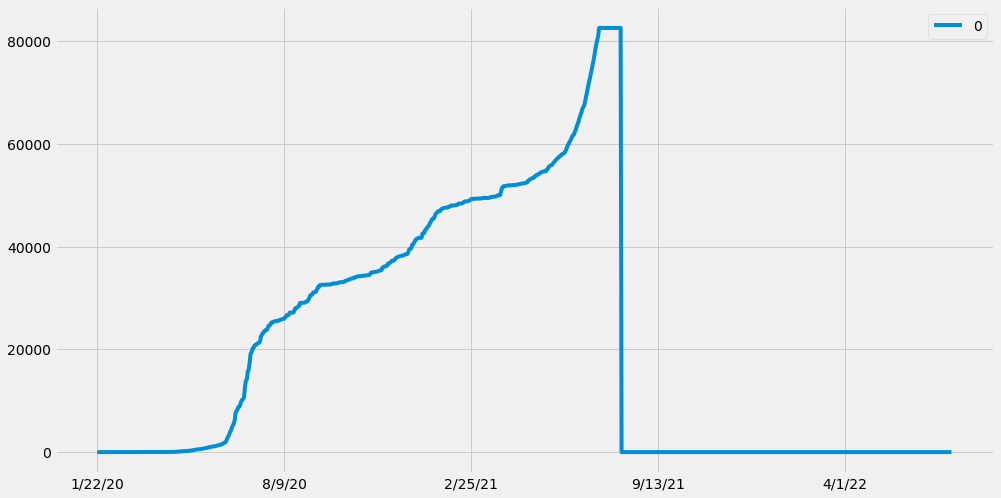

In [ ]:
fig,ax = plt.subplots(figsize=(15,8))
recover_cases.head(1).transpose().plot.line(ax = ax)

Nhận thấy bảng deaths(số ca tử vong) và confirmed(tổng số ca nhiễm) đều có dạng tăng dần theo thời gian, nghĩa là dữ liệu giá trị trong ngày t là giá trị số ca của ngày t-1 đã cộng thêm số ca thêm của ngày t. Theo cách ghi dữ liệu như vậy thì bảng recoveries(số ca khỏi) không thực hiện cùng phương pháp mà chỉ ghi số ca trong 1 số ngày đầu còn những ngày sau không cập nhật. Do đó, ta cần đưa dữ liệu về cùng cách ghi như trên.

In [ ]:
#fixing function
def fix_revoveries(row):
    for i in range(1,len(days)):
        if row[i]>=row[i-1]: continue
        row[i] = row[i-1]
    return row[i]
recover_cases.apply(fix_revoveries, axis=1)
recover_cases.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,7/15/22,7/16/22,7/17/22,7/18/22,7/19/22,7/20/22,7/21/22,7/22/22,7/23/22,7/24/22
0,0,0,0,0,0,0,0,0,0,0,...,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586
1,0,0,0,0,0,0,0,0,0,0,...,130314,130314,130314,130314,130314,130314,130314,130314,130314,130314
2,0,0,0,0,0,0,0,0,0,0,...,118409,118409,118409,118409,118409,118409,118409,118409,118409,118409
3,0,0,0,0,0,0,0,0,0,0,...,14380,14380,14380,14380,14380,14380,14380,14380,14380,14380
4,0,0,0,0,0,0,0,0,0,0,...,39582,39582,39582,39582,39582,39582,39582,39582,39582,39582


In [ ]:
#đưa giá trị chỉnh sửa về df gốc
recoveries_df[days] = recover_cases.values
recoveries_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/15/22,7/16/22,7/17/22,7/18/22,7/19/22,7/20/22,7/21/22,7/22/22,7/23/22,7/24/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,130314,130314,130314,130314,130314,130314,130314,130314,130314,130314
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,118409,118409,118409,118409,118409,118409,118409,118409,118409,118409
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,14380,14380,14380,14380,14380,14380,14380,14380,14380,14380
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,39582,39582,39582,39582,39582,39582,39582,39582,39582,39582


#  4. Tìm hiểu dữ liệu 


    Xác định ngày đầu tiên bộ dữ liệu bắt đầu lưu trữ số ca Covid của 3 bộ dữ liệu

In [ ]:
# Nhập code ở đây:
      
df = pd.concat([pd.Series(confirmed_df.columns), pd.Series(deaths_df.columns), pd.Series(recoveries_df.columns)], axis = 1)
df[4:].astype('datetime64').min()

0   2020-01-22
1   2020-01-22
2   2020-01-22
dtype: datetime64[ns]

    Xác định ngày cuối cùng dữ liệu được cập nhật số ca Covid của 3 DataFrames

In [ ]:
# Nhập code ở đây:
df[4:].astype('datetime64').max()

0   2022-07-24
1   2022-07-24
2   2022-07-24
dtype: datetime64[ns]

    Xác định có bao nhiêu quốc gia trong dữ liệu này

In [ ]:
# Nhập code ở đây:
df_country = pd.concat([confirmed_df['Country/Region'], deaths_df['Country/Region'], recoveries_df['Country/Region']], axis = 1)
df_country.nunique()

Country/Region    199
Country/Region    199
Country/Region    199
dtype: int64

    Tính tổng số ngày có trong 3 bộ dữ liệu
  



In [ ]:
# Nhập code ở đây:
df[4:].nunique()

0    915
1    915
2    915
dtype: int64

    Quan sát xem có quốc gia nào bị trùng lặp trong 3 bộ dữ liệu hay không

In [ ]:
# Nhập code ở đây (confirmed_df):
confirmed_df[confirmed_df.duplicated(subset = 'Country/Region', keep = False)]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/15/22,7/16/22,7/17/22,7/18/22,7/19/22,7/20/22,7/21/22,7/22/22,7/23/22,7/24/22
9,Australian Capital Territory,Australia,-35.473500,149.012400,0,0,0,0,0,0,...,176165,178225,179112,180333,181294,182701,183592,184636,185348,186138
10,New South Wales,Australia,-33.868800,151.209300,0,0,0,0,3,4,...,2982583,2992755,3002504,3016037,3031246,3045062,3063719,3078551,3091346,3102071
11,Northern Territory,Australia,-12.463400,130.845600,0,0,0,0,0,0,...,84105,84568,85034,85705,86345,87009,87530,87949,88303,88636
12,Queensland,Australia,-27.469800,153.025100,0,0,0,0,0,0,...,1382013,1388004,1394701,1404722,1414382,1426054,1435080,1442714,1448511,1454617
13,South Australia,Australia,-34.928500,138.600700,0,0,0,0,0,0,...,649889,653247,657528,661967,666858,672144,676777,680702,684152,684152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,Jersey,United Kingdom,49.213800,-2.135800,0,0,0,0,0,0,...,56803,56803,56803,56803,56803,56803,56803,57541,57541,57541
271,Montserrat,United Kingdom,16.742498,-62.187366,0,0,0,0,0,0,...,1025,1025,1025,1025,1025,1032,1032,1040,1040,1040
272,"Saint Helena, Ascension and Tristan da Cunha",United Kingdom,-7.946700,-14.355900,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,4
273,Turks and Caicos Islands,United Kingdom,21.694000,-71.797900,0,0,0,0,0,0,...,6255,6255,6255,6255,6255,6255,6255,6279,6279,6279


In [ ]:
# Nhập code ở đây (deaths_df):
deaths_df[deaths_df.duplicated(subset = 'Country/Region', keep = False)]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/15/22,7/16/22,7/17/22,7/18/22,7/19/22,7/20/22,7/21/22,7/22/22,7/23/22,7/24/22
9,Australian Capital Territory,Australia,-35.473500,149.012400,0,0,0,0,0,0,...,84,84,84,84,84,85,86,89,89,89
10,New South Wales,Australia,-33.868800,151.209300,0,0,0,0,0,0,...,3836,3848,3853,3879,3899,3924,3939,3980,3994,4001
11,Northern Territory,Australia,-12.463400,130.845600,0,0,0,0,0,0,...,54,54,54,54,54,54,54,54,54,54
12,Queensland,Australia,-27.469800,153.025100,0,0,0,0,0,0,...,1410,1410,1409,1427,1442,1452,1462,1470,1470,1470
13,South Australia,Australia,-34.928500,138.600700,0,0,0,0,0,0,...,568,569,571,574,596,603,610,613,614,614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,Jersey,United Kingdom,49.213800,-2.135800,0,0,0,0,0,0,...,131,131,131,131,131,131,131,131,131,131
271,Montserrat,United Kingdom,16.742498,-62.187366,0,0,0,0,0,0,...,8,8,8,8,8,8,8,8,8,8
272,"Saint Helena, Ascension and Tristan da Cunha",United Kingdom,-7.946700,-14.355900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
273,Turks and Caicos Islands,United Kingdom,21.694000,-71.797900,0,0,0,0,0,0,...,36,36,36,36,36,36,36,36,36,36


In [ ]:
# Nhập code ở đây (recoveries_df):
recoveries_df[recoveries_df.duplicated(subset = 'Country/Region', keep = False)]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/15/22,7/16/22,7/17/22,7/18/22,7/19/22,7/20/22,7/21/22,7/22/22,7/23/22,7/24/22
9,Australian Capital Territory,Australia,-35.473500,149.012400,0,0,0,0,0,0,...,121,121,121,121,121,121,121,121,121,121
10,New South Wales,Australia,-33.868800,151.209300,0,0,0,0,0,0,...,2997,2997,2997,2997,2997,2997,2997,2997,2997,2997
11,Northern Territory,Australia,-12.463400,130.845600,0,0,0,0,0,0,...,193,193,193,193,193,193,193,193,193,193
12,Queensland,Australia,-27.469800,153.025100,0,0,0,0,0,0,...,1727,1727,1727,1727,1727,1727,1727,1727,1727,1727
13,South Australia,Australia,-34.928500,138.600700,0,0,0,0,0,0,...,841,841,841,841,841,841,841,841,841,841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,Jersey,United Kingdom,49.213800,-2.135800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
256,Montserrat,United Kingdom,16.742498,-62.187366,0,0,0,0,0,0,...,19,19,19,19,19,19,19,19,19,19
257,"Saint Helena, Ascension and Tristan da Cunha",United Kingdom,-7.946700,-14.355900,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,4
258,Turks and Caicos Islands,United Kingdom,21.694000,-71.797900,0,0,0,0,0,0,...,2433,2433,2433,2433,2433,2433,2433,2433,2433,2433


    Xác định những quốc gia có trong 3 bộ dữ liệu được lưu trữ số ca Covid theo toàn quốc chứ không theo từng thành phố


In [ ]:
# Nhập code ở đây (recoveries_df):
recoveries_df.drop_duplicates(subset = 'Country/Region', keep = False)['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'Colombia', 'Comoros',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana

    Xác định những quốc gia có trong 3 bộ dữ liệu được lưu trữ số ca Covid theo từng thành phố

In [ ]:
# Nhập code ở đây (recoveries_df):
recoveries_df[recoveries_df.duplicated(subset = 'Country/Region', keep = False)]['Country/Region'].unique()

array(['Australia', 'China', 'Denmark', 'France', 'Netherlands',
       'New Zealand', 'United Kingdom'], dtype=object)

    Xác định quốc gia và ngày mà có số ca Covid nhiều nhất

In [ ]:
# Nhập code ở đây:
confirmed_maxday = confirmed_df.iloc[:,4:].max().idxmax()
df_maxday = confirmed_df.sort_values(confirmed_maxday, ascending = False)
df_maxday[['Country/Region', confirmed_maxday]].head(1)

,Country/Region,7/24/22
257,US,90410386


    Xác định quốc gia có tổng số người mất do Covid là nhiều nhất

In [ ]:
# Nhập code ở đây:
death_new = deaths_df.copy()
death_new['Total'] = death_new.iloc[:,4:].max(axis = 1)
death_new.sort_values('Total', ascending = False)['Country/Region'].head(1)

257    US
Name: Country/Region, dtype: object

    Tính tổng số ca Covid, số ca tử vong, cố ca hồi phục và số ca còn Covid ở thời điểm hiện tại của Việt Nam


In [ ]:
# Nhập code ở đây:
confirmed_df1 = confirmed_df.copy()
deaths_df1 = deaths_df.copy()
recoveries_df1 = recoveries_df.copy()

confirmed_df1['Total'] = confirmed_df1.iloc[:, 4:].max(axis = 1)
deaths_df1['Total'] = deaths_df1.iloc[:, 4:].max(axis = 1)
recoveries_df1['Total'] = recoveries_df1.iloc[:, 4:].max(axis = 1)

confirmed_vn = confirmed_df1[confirmed_df1['Country/Region'] == 'Vietnam']['Total'].values
deaths_vn = deaths_df1[deaths_df1['Country/Region'] == 'Vietnam']['Total'].values
recoveries_vn = recoveries_df1[recoveries_df1['Country/Region'] == 'Vietnam']['Total'].values
remain_vn = confirmed_vn - deaths_vn - recoveries_vn

print (
        '''
        Tổng số ca Covit: {}
        Tổng số ca tử vong: {}
        Tổng số ca phục hồi: {}
        Tổng số ca còn Covit: {}
        '''
       .format(confirmed_vn, deaths_vn, recoveries_vn, remain_vn)
      )


        Tổng số ca Covit: [10767948]
        Tổng số ca tử vong: [43092]
        Tổng số ca phục hồi: [54332]
        Tổng số ca còn Covit: [10670524]
        


#  5. Phân tích toàn cầu

## Bài toán 1

    Tính số lượng tổng số trường hợp Covid, tổng số ca tử vong, tổng số ca phục hồi và số ca còn đang mắc Covid theo thời gian (đơn vị ngày).

In [ ]:
cols = confirmed_df.keys()
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]
dates = confirmed.keys()

total_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = [] 
adjusted_dates = list(np.array([i for i in range(len(dates))]).reshape(-1, 1)[:, 0])
#Nhập code ở đây:
def case_day(column):
    total_cases.append(sum(column))
def death_day(column):
    total_deaths.append(sum(column))
def recovered_day(column):
    total_recovered.append(sum(column))
    
confirmed.apply(case_day, axis = 0)
deaths.apply(death_day, axis = 0)

recoveries.apply(recovered_day, axis = 0)

for i in adjusted_dates:
    total_active.append(total_cases[i] - total_deaths[i] - total_recovered[i])

In [ ]:
# Tống số trường hợp Covid, tổng số ca tử vong, tổng số ca phục hồi và số ca còn mắc Covid cho tới giờ.
print("Total confirmed cases: ", total_cases[-1])
print("Total death cases: ", total_deaths[-1])
print("Total recoveries cases: ", total_recovered[-1])
print("Total active cases: ", total_active[-1])

Total confirmed cases:  570190176
Total death cases:  6384335
Total recoveries cases:  137254523
Total active cases:  426551318


## Bài toán 2

    Hiển thị số lượng và log(10) của tổng số trường hợp Covid, tổng số ca tử vong, tổng số ca phục hồi và tổng số ca còn mắc covid theo thời gian (đơn vị ngày) trong 2 biểu đồ (một cho số lượng và một cho log(10)) bằng cách sử dụng biểu đồ đường.

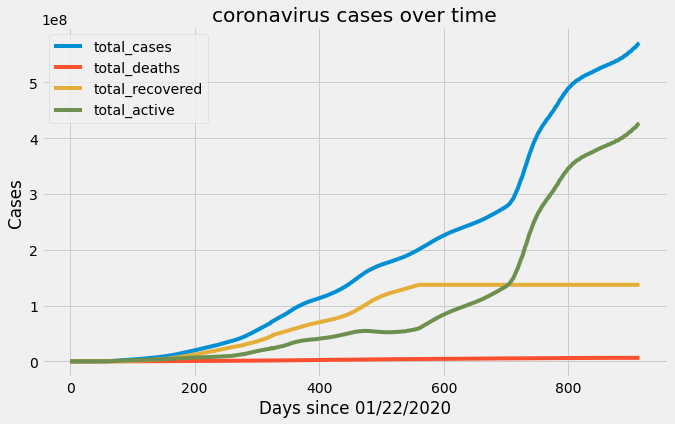

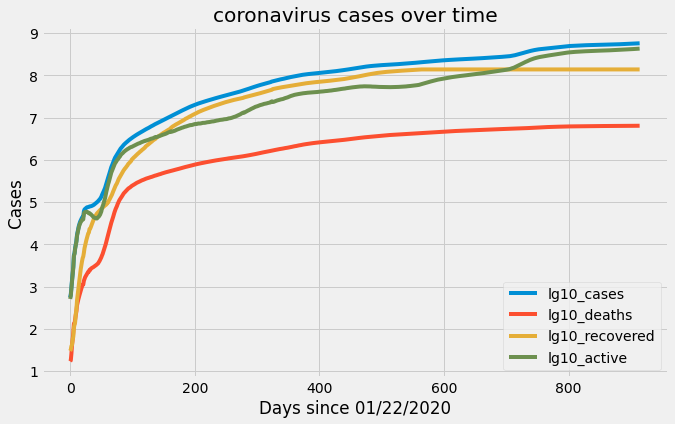

In [ ]:
#Nhập code ở đây:
#create data log10
import math
lg10_cases = tuple(math.log10(i) for i in total_cases)
lg10_deaths = tuple(math.log10(i) for i in total_deaths)
lg10_recovered = []
for i in total_recovered:
    if i != 0: lg10_recovered.append(math.log10(i))
lg10_recovered = tuple(lg10_recovered)
lg10_active = tuple(math.log10(i) for i in total_active)
lg10 = list([lg10_cases, lg10_deaths, lg10_recovered, lg10_active])
df_lg10 = pd.DataFrame(lg10, index = ['lg10_cases', 'lg10_deaths', 'lg10_recovered', 'lg10_active']).transpose()
#join all total
total = list([total_cases, total_deaths, total_recovered, total_active])
df_total = pd.DataFrame(total, index = ['total_cases', 'total_deaths', 'total_recovered', 'total_active']).transpose()
#create chart
df_total.plot(kind = 'line',figsize=(10,6), 
             title='coronavirus cases over time',
             ylabel = 'Cases',
             xlabel = 'Days since 01/22/2020')
df_lg10.plot(kind = 'line',figsize=(10,6), 
             title='coronavirus cases over time',
             ylabel = 'Cases',
             xlabel = 'Days since 01/22/2020')

plt.show()


## Bài toán 3
    Hiển thị tổng số trường hợp Covid, tổng số ca tử vong, tổng số ca phục hồi và tổng số ca còn mắc covid theo thời gian (đơn vị ngày) ở 4 biểu đồ riêng biệt bằng cách sử dụng biểu đồ đường.

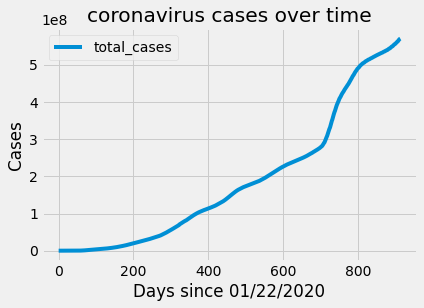

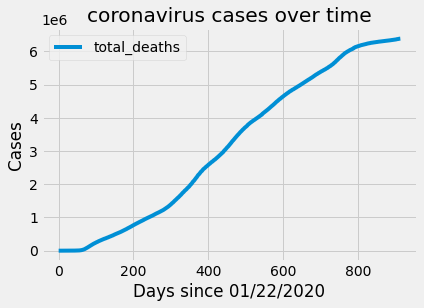

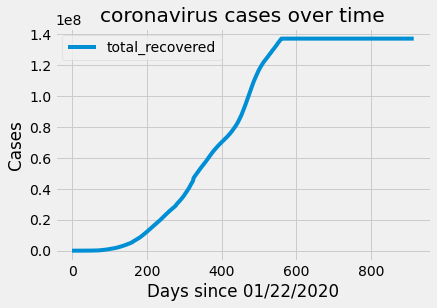

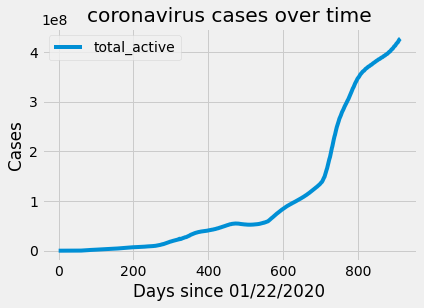

In [ ]:
#Nhập code ở đây:
df_cases = pd.DataFrame(total_cases, columns = ['total_cases'])
df_cases.plot.line(title='coronavirus cases over time',
                  ylabel = 'Cases',
                  xlabel = 'Days since 01/22/2020')
df_deaths = pd.DataFrame(total_deaths, columns = ['total_deaths'])
df_deaths.plot.line(title='coronavirus cases over time',
                  ylabel = 'Cases',
                  xlabel = 'Days since 01/22/2020')
df_recovered = pd.DataFrame(total_recovered, columns = ['total_recovered'])
df_recovered.plot.line(title='coronavirus cases over time',
                  ylabel = 'Cases',
                  xlabel = 'Days since 01/22/2020')
df_active = pd.DataFrame(total_active, columns = ['total_active'])
df_active.plot.line(title='coronavirus cases over time',
                  ylabel = 'Cases',
                  xlabel = 'Days since 01/22/2020')


## Bài toán 4
    Tính số lượng gia tăng hàng ngày về: tổng số ca mắc Covid, tổng số ca tử vong, tổng số ca phục hồi và tổng số ca còn mắc Covid theo thời gian (đơn vị ngày).

In [ ]:
#Nhập code ở đây:
increase_cases = []
increase_deaths = []
increase_recovered = []
increase_active = []
for i in range(max(adjusted_dates) - 1):
    increase_cases.append(total_cases[i+1] - total_cases[i])
    increase_deaths.append(total_deaths[i+1] - total_deaths[i])
    increase_recovered.append(total_recovered[i+1] - total_recovered[i])
    increase_active.append(total_active[i+1] - total_active[i])


## Bài toán 5
    Tính số lượng gia tăng hàng ngày về: tổng số ca mắc Covid, tổng số ca tử vong, tổng số ca phục hồi và tổng số ca còn mắc Covid theo thời gian (đơn vị ngày ở 4 biểu đồ riêng biệt).

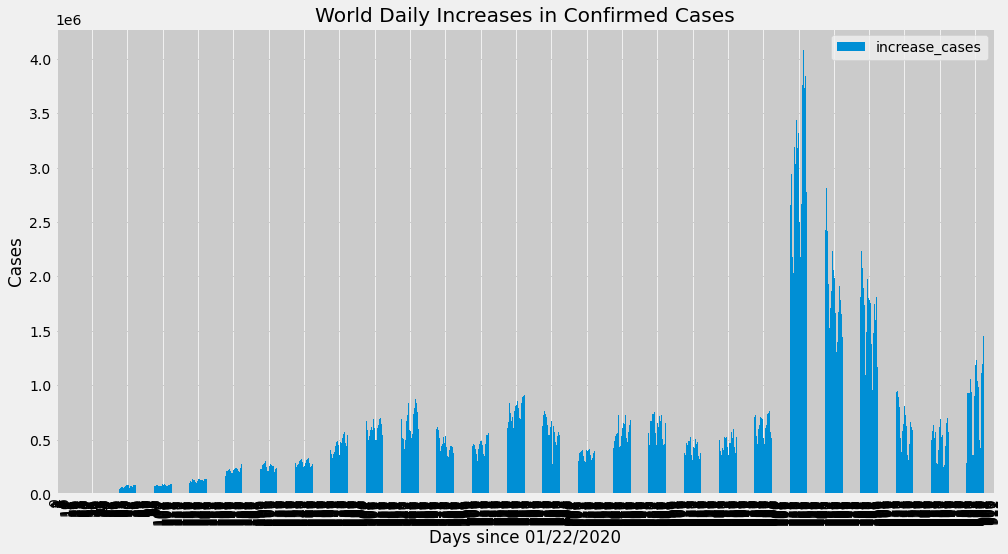

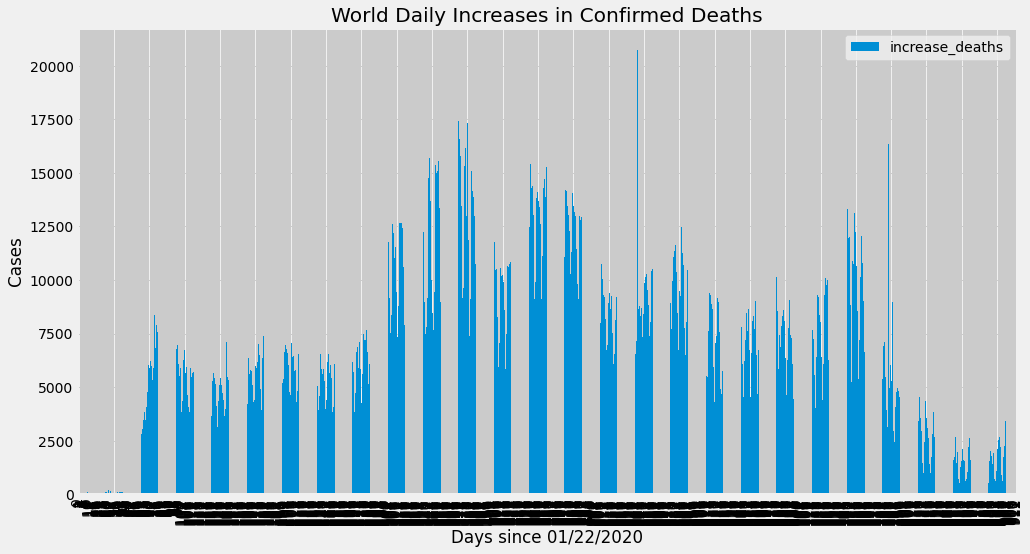

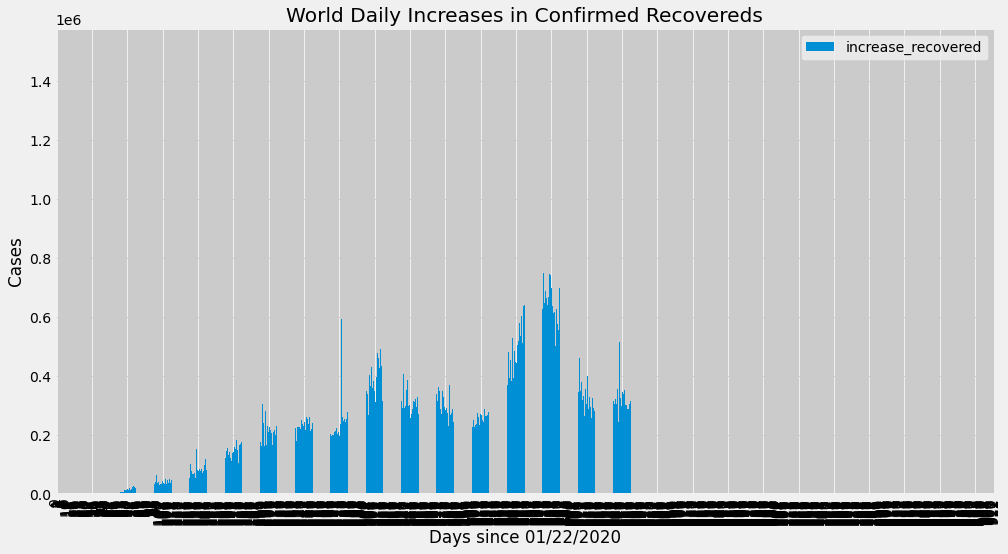

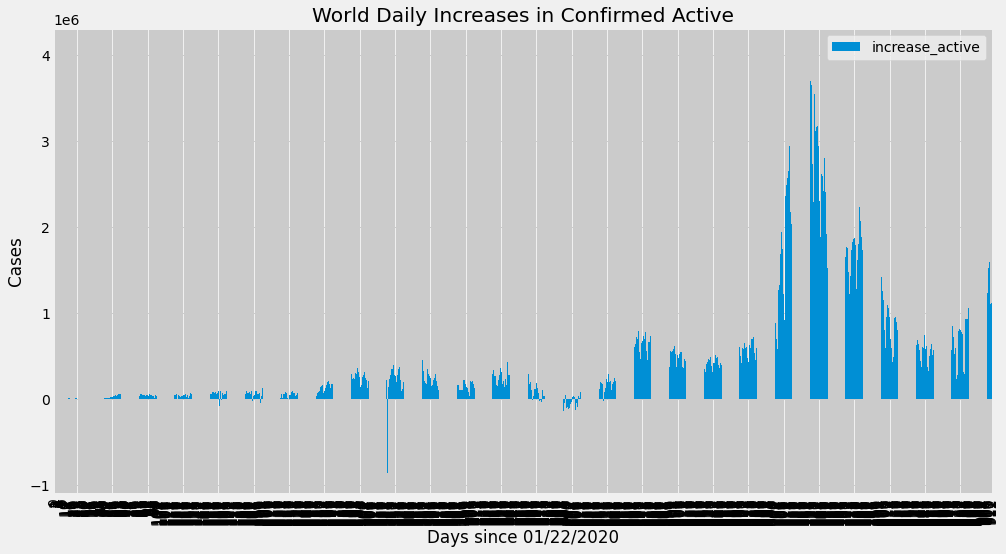

In [ ]:
#Nhập code ở đây:
df_increase_cases = pd.DataFrame(increase_cases, columns = ['increase_cases'])
df_increase_cases.plot.bar(figsize=(15,8),
                           title='World Daily Increases in Confirmed Cases',
                           ylabel = 'Cases',
                           xlabel = 'Days since 01/22/2020',)
df_increase_deaths = pd.DataFrame(increase_deaths, columns = ['increase_deaths'])
df_increase_deaths.plot.bar(figsize=(15,8),
                           title='World Daily Increases in Confirmed Deaths',
                           ylabel = 'Cases',
                           xlabel = 'Days since 01/22/2020')
df_increase_recovered = pd.DataFrame(increase_recovered, columns = ['increase_recovered'])
df_increase_recovered.plot.bar(figsize=(15,8),
                           title='World Daily Increases in Confirmed Recovereds',
                           ylabel = 'Cases',
                           xlabel = 'Days since 01/22/2020')
df_increase_active = pd.DataFrame(increase_active, columns = ['increase_active'])
df_increase_active.plot.bar(figsize=(15,8),
                           title='World Daily Increases in Confirmed Active',
                           ylabel = 'Cases',
                           xlabel = 'Days since 01/22/2020')

## Bài toán 6
    Tính phần trăm tỷ lệ tử vong toàn cầu và tỷ lệ hồi phục theo thời gian.

In [ ]:
#Nhập code ở đây:
for i in adjusted_dates:
    mortality_rate.append(total_deaths[i] / total_cases[i] * 100)
    recovery_rate.append(total_recovered[i] / total_cases[i] * 100)



## Bài toán 7
**7.1** 

    Hiển thị tỷ lệ tử vong theo thời gian (đơn vị ngày) bằng biểu đồ đường.

    Sử dụng đường gạch ngang để hiển thị tỷ lệ tử vong trung bình theo thời gian.

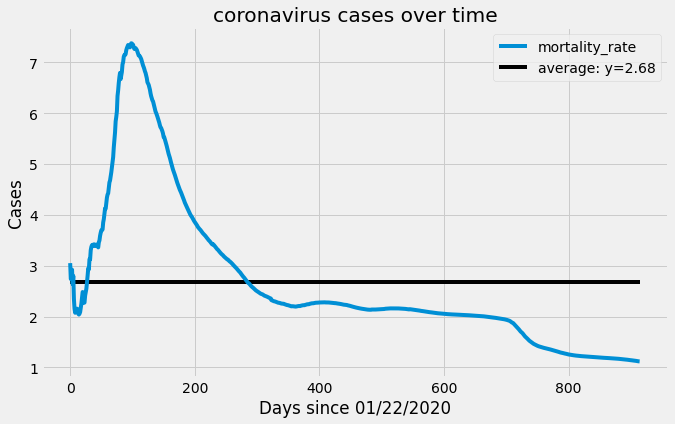

In [ ]:
#Nhập code ở đây:
mortality_df = pd.DataFrame(map(float,mortality_rate), columns = ['mortality_rate'])
mortality_df.plot(kind = 'line', figsize = (10,6),
                 title='coronavirus cases over time',
                 ylabel = 'Cases',
                 xlabel = 'Days since 01/22/2020')
plt.hlines(mortality_df.mean(), xmin = 0, xmax = max(adjusted_dates),
           colors = 'black')
plt.legend(labels = ['mortality_rate','average: y={}'.format(round(mortality_df.values.mean(),2))], loc='upper right')

**7.2** 

    Hiển thị tỷ lệ hồi phục theo thời gian (đơn vị ngày) bằng biểu đồ đường.

    Sử dụng đường gạch ngang để hiển thị tỷ lệ tử vong trung bình theo thời gian.

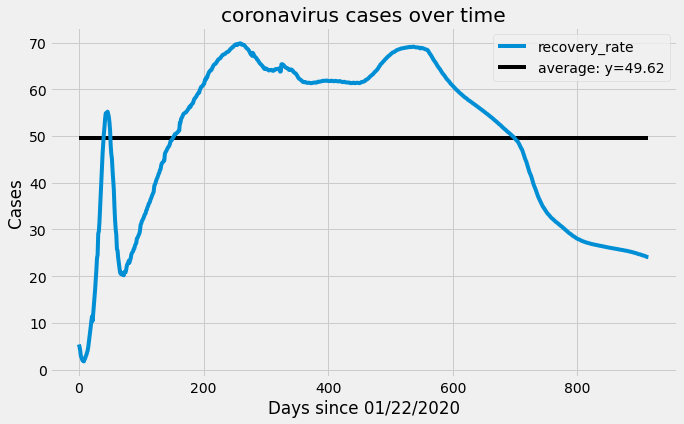

In [ ]:
#Nhập code ở đây:
recovery_df = pd.DataFrame(map(float,recovery_rate), columns = ['recovery_rate'])
recovery_df.plot(kind = 'line', figsize = (10,6),
                 title='coronavirus cases over time',
                 ylabel = 'Cases',
                 xlabel = 'Days since 01/22/2020')
plt.hlines(recovery_df.mean(), xmin = 0, xmax = max(adjusted_dates),
           colors = 'black')
plt.legend(labels = ['recovery_rate','average: y={}'.format(round(recovery_df.values.mean(),2))], loc='upper right')

#  6. Phân tích theo châu lục

## Tiền xử lý dữ liệu

In [ ]:
# Thay đổi tên quốc gia theo yêu cầu của pycountry_convert Lib
confirmed_df.loc[confirmed_df['Country/Region'] == "US", "Country/Region"] = "USA"
deaths_df.loc[deaths_df['Country/Region'] == "US", "Country/Region"] = "USA"
recoveries_df.loc[recoveries_df['Country/Region'] == "US", "Country/Region"] = "USA"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Korea, South', "Country/Region"] = 'South Korea'
deaths_df.loc[deaths_df['Country/Region'] == 'Korea, South', "Country/Region"] = 'South Korea'
recoveries_df.loc[recoveries_df['Country/Region'] == "Korea, South", "Country/Region"] = "South Korea"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Taiwan*', "Country/Region"] = 'Taiwan'
deaths_df.loc[deaths_df['Country/Region'] == 'Taiwan*', "Country/Region"] = 'Taiwan'
recoveries_df.loc[recoveries_df['Country/Region'] == "Taiwan*", "Country/Region"] = "Taiwan"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Congo (Kinshasa)', "Country/Region"] = 'Democratic Republic of the Congo'
deaths_df.loc[deaths_df['Country/Region'] == 'Congo (Kinshasa)', "Country/Region"] = 'Democratic Republic of the Congo'
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Kinshasa)", "Country/Region"] = "Democratic Republic of the Congo"

confirmed_df.loc[confirmed_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"
deaths_df.loc[deaths_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"
recoveries_df.loc[recoveries_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"

confirmed_df.loc[confirmed_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"
deaths_df.loc[deaths_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"
recoveries_df.loc[recoveries_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Congo (Brazzaville)', "Country/Region"] = 'Republic of the Congo'
deaths_df.loc[deaths_df['Country/Region'] == 'Congo (Brazzaville)', "Country/Region"] = 'Republic of the Congo'
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Brazzaville)", "Country/Region"] = "Republic of the Congo"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Bahamas, The', "Country/Region"] = 'Bahamas'
deaths_df.loc[deaths_df['Country/Region'] == 'Bahamas, The', "Country/Region"] = 'Bahamas'
recoveries_df.loc[recoveries_df['Country/Region'] == "Bahamas, The", "Country/Region"] = "Bahamas"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Gambia, The', "Country/Region"] = 'Gambia'
deaths_df.loc[deaths_df['Country/Region'] == 'Gambia, The', "Country/Region"] = 'Gambia'
recoveries_df.loc[recoveries_df['Country/Region'] == "Gambia, The", "Country/Region"] = "Gambia"

# nhận tất cả các quốc gia
countries = np.asarray(confirmed_df["Country/Region"])
countries1 = np.asarray(deaths_df["Country/Region"])
countries2 = np.asarray(recoveries_df["Country/Region"])

# Continent_code thành Continent_names
continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU' : 'Europe',
    'na' : 'Others'
}

# Định nghĩa hàm để nhận continent code cho quốc gia.
def country_to_continent_code(country):
    try:
        return pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country))
    except :
        return 'na'


## Bài toán 8
    Thêm trường "continent" vào tập dữ liệu confirm_df, death_df và recorveries_df:

In [ ]:
#Nhập code ở đây:
cf_continent_code = pd.Series(countries).apply(country_to_continent_code)
dt_continent_code = pd.Series(countries1).apply(country_to_continent_code)
rc_continent_code = pd.Series(countries2).apply(country_to_continent_code)

for i in range(len(cf_continent_code)):
    if cf_continent_code[i] in continents:
        cf_continent_code[i] = continents[cf_continent_code[i]]
for i in range(len(dt_continent_code)):
    if dt_continent_code[i] in continents:
        dt_continent_code[i] = continents[dt_continent_code[i]]
for i in range(len(rc_continent_code)):
    if rc_continent_code[i] in continents:
        rc_continent_code[i] = continents[rc_continent_code[i]]

confirmed_df['continent'] = cf_continent_code
deaths_df['continent'] = dt_continent_code
recoveries_df['continent'] = rc_continent_code

## Bài toán 9
    Tạo data frame country_df với chỉ mục là trường "Country/Region".
    Các cột thông tin này gồm:
    - continent: Châu lục.
    - Confirmed: Tổng số ca mắc.
    - Deaths: Tổng số ca tử vong.
    - Recoveries: Tổng số ca hồi phục.
    - Active: Tổng số ca còn mắc Covid.
    - Mortality Rate: Tỷ lệ tử vong tính theo phần trăm.

In [ ]:
#Nhập code ở đây:

country_df = confirmed_df[['Country/Region','continent']].drop_duplicates().sort_values('Country/Region')
#country_df.reset_index()
country_df['Confirmed'] = list(confirmed_df.groupby('Country/Region')[confirmed_df.columns[-2]].sum())
country_df['Deaths'] = list(deaths_df.groupby('Country/Region')[deaths_df.columns[-2]].sum())
country_df['Recoveries'] = list(recoveries_df.groupby('Country/Region')[recoveries_df.columns[-2]].sum())
#country_df.fillna(0, inplace = True)
country_df['Active'] = country_df['Confirmed'] - country_df['Deaths'] - country_df['Recoveries']
country_df['Mortality Rate'] = round(country_df['Deaths'] / country_df['Confirmed'] * 100,2)
country_df = country_df.set_index('Country/Region')
country_df
#country_df[country_df['Active'] < 0]


,continent,Confirmed,Deaths,Recoveries,Active,Mortality Rate
Country/Region,,,,,,
Afghanistan,Asia,184587,7738,82586,94263,4.19
Albania,Europe,293917,3517,130314,160086,1.20
Algeria,Africa,266839,6876,118409,141554,2.58
Andorra,Europe,45326,153,14380,30793,0.34
Angola,Africa,102301,1912,39582,60807,1.87
...,...,...,...,...,...,...
West Bank and Gaza,Others,672039,5664,312320,354055,0.84
Winter Olympics 2022,Others,535,0,0,535,0.00
Yemen,Asia,11849,2149,4251,5449,18.14


## Bài toán 10
    Tạo data frame continents_df với chỉ mục là trường "continent".
    Các cột thông tin này gồm: 
    - Confirmed: Tổng số ca mắc.
    - Deaths: Tổng số ca tử vong.
    - Recoveries: Tổng số ca hồi phục.
    - Active: Tổng số ca còn mắc Covid.
    - Mortality Rate: Tỷ lệ tử vong tính theo phần trăm.

In [ ]:
#Nhập code ở đây:
continents_df = country_df.groupby('continent', axis = 0).sum()
continents_df['Active'] = continents_df['Confirmed'] - continents_df['Deaths'] - continents_df['Recoveries']
continents_df['Mortality Rate'] = round(continents_df['Deaths'] / continents_df['Confirmed'] * 100,2)

continents_df

,Confirmed,Deaths,Recoveries,Active,Mortality Rate
continent,,,,,
Africa,12219674,255809,5955131,6008734,2.09
Asia,161860392,1426225,57860294,102573873,0.88
Australia,10895631,14886,58287,10822458,0.14
Europe,214948561,1874008,27994507,185080046,0.87
North America,107036555,1472040,12075021,93489494,1.38
Others,1556412,28415,654615,873382,1.83
South America,61672951,1312952,32656668,27703331,2.13


## Bài toán 12
    Trực quan hóa ma trận hiệp phương sai cho continents_df.

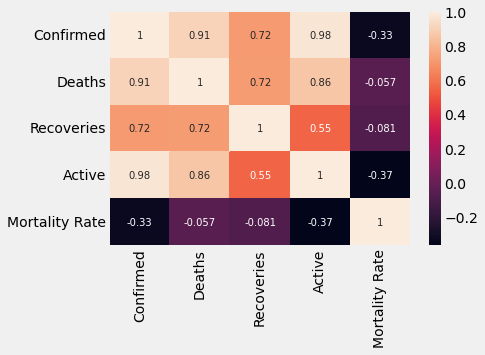

In [ ]:
#Nhập code ở đây:

sns.heatmap(continents_df.corr(), fmt='.2g', annot=True,annot_kws={'size':10})
plt.show()

## Bài toán 13
    Xây dựng biểu đồ tròn để so sánh tỷ lệ số ca mắc được xác nhận, số ca tử vong, số ca phục hồi và số ca vẫn còn mắc của 7 châu lục.
    Mỗi trường (confirm, deaths, ...) nên được trình bày trong các biểu đồ tròn khác nhau.
    Bạn không được sử dụng đoạn code lặp lại ở đây, hãy thử sử dụng vòng lặp for.
    Mỗi châu lục nên được trình bày bằng các màu sắc khác nhau.

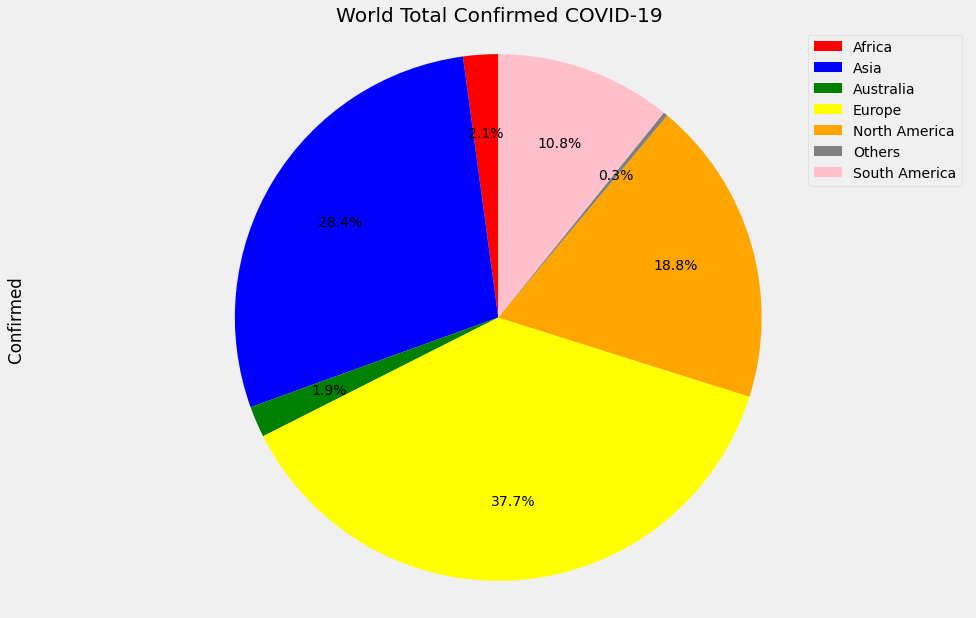

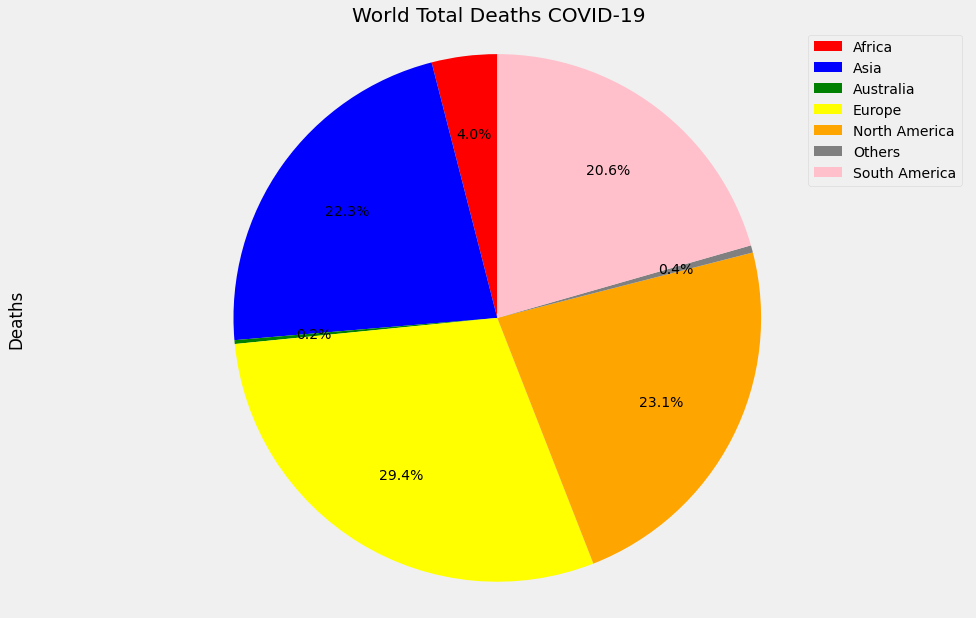

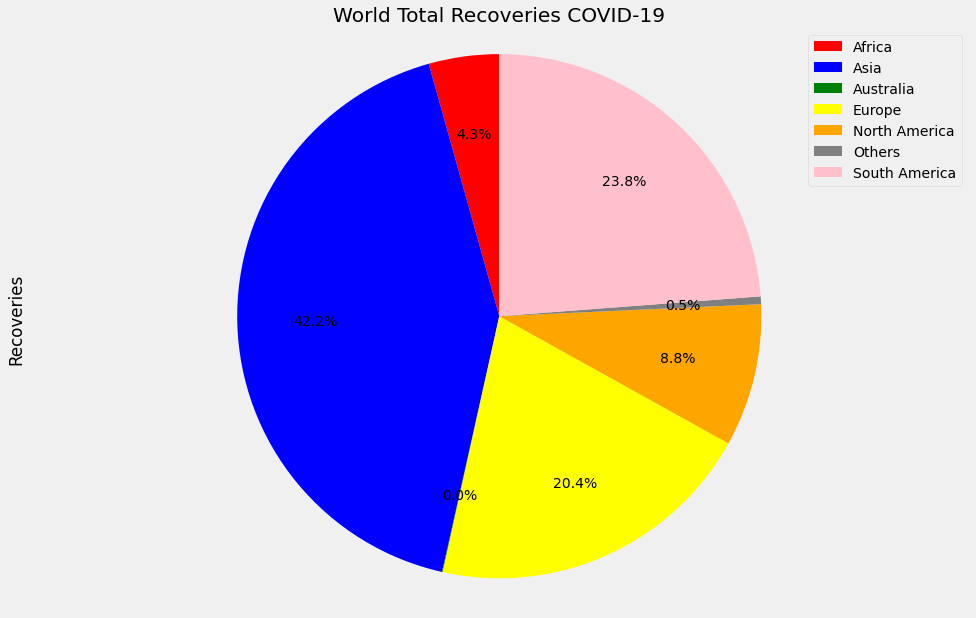

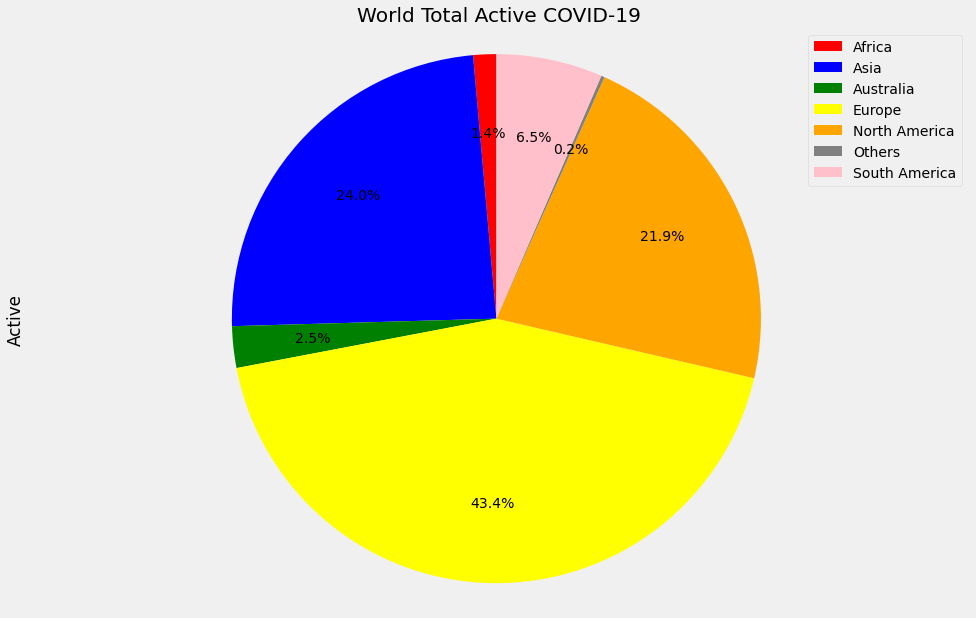

In [ ]:
#Nhập code ở đây:
lst = ['Confirmed', 'Deaths', 'Recoveries', 'Active']
for i in lst:
    continents_df[i].plot(kind = 'pie', figsize = (15,10),
                                autopct='%1.1f%%',
                                startangle=90,
                                colors = ['red', 'blue', 'green','yellow', 'orange', 'gray', 'pink'],                            
                                labels = None,
                                pctdistance = 0.7
                               )
    plt.title('World Total '+ i+ ' COVID-19')
    plt.legend(labels = continents_df.index, loc = 'upper right')
    plt.axis('equal')
    plt.show()

# 7. Phân tích theo quốc gia

## Bài toán 14
    Xây dựng bản đồ folium để hiển thị số ca được xác nhận, số ca tử vong, số ca phục hồi và tỷ lệ tử vong của mỗi quốc gia dựa trên vị trí của các quốc gia. Bán kính của vòng tròn tỷ lệ thuận với số ca được xác nhận.


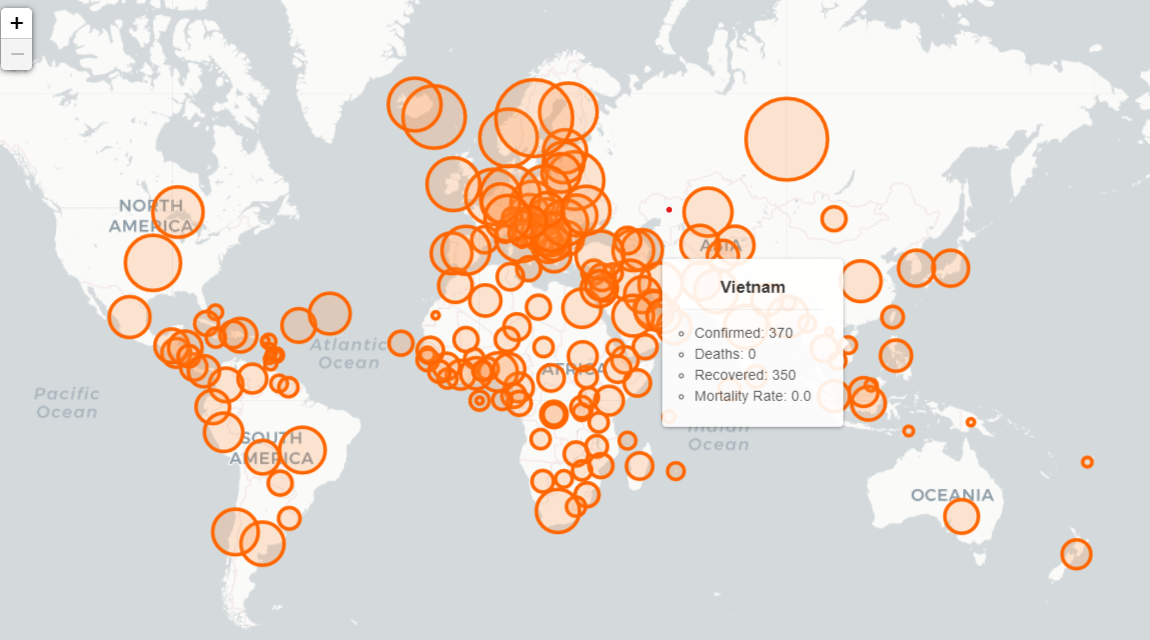

In [ ]:
#Nhập code ở đây:
import folium
from plotly.offline import init_notebook_mode
init_notebook_mode(connected = True)

country_df_new = country_df.copy()
country_df_new['Lat'] = confirmed_df.groupby('Country/Region')['Lat'].max().tolist()
country_df_new['Long'] = confirmed_df.groupby('Country/Region')['Long'].max().tolist()
#create map
country_df_map = folium.Map(location = [0,0], zoom_start = 10)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, radius in zip(country_df_new['Lat'], country_df_new['Long'], 
                                   country_df_new.index, country_df_new['Confirmed']):
    folium.features.CircleMarker(
        [lat, lng],
        radius=radius, # define how big the circle markers to be
        color='yellow',
        popup=label
    ).add_to(country_df_map)
# display map
country_df_map

## Bài toán 15
Xây dựng bản đồ px [(plotly.express)](https://plotly.com/python/plotly-express/) để hiển thị số ca còn mắc Covid của mỗi quốc gia trong log(10) dựa trên tên các quốc gia bằng cách sử dụng màu "quang phổ".

In [ ]:
#Nhập code ở đây:
#create data
df_country_lg10 = df_lg10.copy()
df_country_lg10['Country/Region'] = confirmed_df['Country/Region']
df_country_lg10 = df_country_lg10.groupby('Country/Region', axis = 0).sum()

fig = px.bar(df_country_lg10, x = df_country_lg10.index, y="lg10_active", color="lg10_active", title="Log(10) Active Cases")
fig.show()

## Bài toán 16
    Lọc 10 quốc gia hàng đầu dựa trên số ca được xác nhận.

In [ ]:
#Nhập code ở đây:
country_df_cp = country_df.copy()
df_top10 = country_df_cp.sort_values('Confirmed', ascending = False).head(10)
df_top10

,continent,Confirmed,Deaths,Recoveries,Active,Mortality Rate
Country/Region,,,,,,
USA,North America,90410386,1026951,6298082,83085353,1.14
India,Asia,43905621,526074,30974748,12404799,1.20
France,Europe,33621366,152390,415505,33053471,0.45
Brazil,South America,33591356,676964,17771228,15143164,2.02
Germany,Europe,30331133,143177,3659260,26528696,0.47
United Kingdom,Europe,23422751,183416,25037,23214298,0.78
Italy,Europe,20660065,170875,4144608,16344582,0.83
South Korea,Asia,19247496,24890,180719,19041887,0.13
Russia,Europe,18262088,374411,5609682,12277995,2.05


## Bài toán 17
    Trực qua hóa 10 quốc gia được xác nhận hàng đầu với số ca vẫn còn mắc Covid, phục hồi và tử vong bằng cách sử dụng biểu đồ thanh xếp chồng lên nhau.

In [ ]:
#Nhập code ở đây:
fig = px.bar(df_top10, x=df_top10.index, y=["Deaths", "Recoveries",'Active'], title="Top 10",
            labels = {'Country/Region': '', 'value':'active cases'})
fig.add_annotation(text = '(USA, {})'.format(df_top10.loc['USA', 'Active']),
                  align = 'left',
                  y= df_top10.loc['USA', 'Confirmed'], x=0.1,
                  bordercolor = 'black')
fig.show()

# 8. Phân tích nâng cao
 

## Bài toán 18
    Dựa trên dữ liệu trực quan toàn cầu, đại dịch COVID 2019 trên thế giới đã đạt đến đỉnh điểm chưa?
    Bạn hãy trả lời ở đây:


<b>Trả lời :</b>

## Bài toán 19
Dựa trên trực quan hóa dữ liệu của châu lục:

    19.1 Châu lục nào có tỷ lệ tử vong cao nhất theo các ca mắc của châu lục?

    19.2 Châu lục nào có tỷ lệ lây lan COVID 2019 cao nhất theo số ca mắc của châu lục?
    
    19.3 Châu lục nào có tỷ lệ phục hồi cao nhất trong tập dữ liệu của các châu lục?

(Lưu ý: Tỷ lệ lan truyền COVID 2019 = Số lượng các ca mới được xác nhận trong 10 ngày qua / số ca mắc trước đó).
Bạn hãy trả lời ở đây:

In [ ]:
continents_df_new = continents_df.copy()
continents_df_new['Recovery_rate'] = round(continents_df['Recoveries'] / continents_df['Confirmed'] * 100,2)

continents_df_new.sort_values('Mortality Rate', ascending = False).head(1)

,Confirmed,Deaths,Recoveries,Active,Mortality Rate,Recovery_rate
continent,,,,,,
South America,61672951,1312952,32656668,27703331,2.13,52.95


In [ ]:
continents_df_new.sort_values('Recovery_rate', ascending = False).head(1)

,Confirmed,Deaths,Recoveries,Active,Mortality Rate,Recovery_rate
continent,,,,,,
South America,61672951,1312952,32656668,27703331,2.13,52.95


Bắc Mỹ có tỷ lệ tử vong và phục hồi cao nhất trong tập dữ liệu châu lục

## Bài toán 20
Dựa trên trực quan hóa dữ liệu theo quốc gia:

    20.1 Quốc gia nào có tỷ lệ tử vong cao nhất theo tập dữ liệu của các quốc gia?

    20.2 Quốc gia nào có tỷ lệ lây lan COVID 2019 cao nhất theo với tập dữ liệu của các quốc gia?
     
    20.3 Quốc gia nào có tỷ lệ hồi phục cao nhất theo tập dữ liệu của các quốc gia?
Bạn hãy trả lời ở đây:
<p><b>Trả lời:</b></p>

- Triều Tiên có tỷ lệ tử vong cao nhất
- Diamond Princess có tỷ lệ hồi phục cao nhất

In [ ]:
country_df_new2 = country_df.copy()
country_df_new2['Recovery_rate'] = round(country_df['Recoveries'] / country_df['Confirmed'] * 100,2)
country_df_new2.sort_values('Mortality Rate', ascending = False).head(1)

,continent,Confirmed,Deaths,Recoveries,Active,Mortality Rate,Recovery_rate
Country/Region,,,,,,,
"Korea, North",Others,1,6,0,-5,600.0,0.0


In [ ]:
country_df_new2.sort_values('Recovery_rate', ascending = False).head(1)

,continent,Confirmed,Deaths,Recoveries,Active,Mortality Rate,Recovery_rate
Country/Region,,,,,,,
Diamond Princess,Others,712,13,699,0,1.83,98.17


## Bài toán 21
**USA dataset**

In [ ]:
us_medical_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/07-06-2020.csv')

Dựa trên USA dataset:

    21.1 Tiểu bang nào có tỷ lệ tử vong cao nhất theo tập dữ liệu của các tiểu bang?

    21.2 Tiểu bang nào có tỷ lệ lây lan COVID 2019 cao nhất theo tập dữ liệu của các tiểu bang?
    
    21.3 Tiểu bang nào có tỷ lệ hồi phục cao nhất theo tập dữ liệu của các tiểu bang?

In [ ]:
#Nhập code ở đây:
us_medical_data.sort_values('Mortality_Rate', ascending = False).head(1)

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,...,Total_Test_Results,People_Hospitalized,Case_Fatality_Ratio,UID,ISO3,Testing_Rate,Hospitalization_Rate,Date,People_Tested,Mortality_Rate
7,Connecticut,US,2020-07-07 04:34:13,41.5978,-72.7554,46976,4338,8210.0,34428.0,9.0,...,NaN,10411.0,NaN,84000009.0,USA,14707.483577,22.162381,2020-07-06,524364.0,9.234503


In [ ]:
us_medical_data['Recovery_rate'] = round(us_medical_data['Recovered']/ us_medical_data['Confirmed'] *100,2)
us_medical_data.sort_values('Recovery_rate', ascending = False).head(1)

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,...,People_Hospitalized,Case_Fatality_Ratio,UID,ISO3,Testing_Rate,Hospitalization_Rate,Date,People_Tested,Mortality_Rate,Recovery_rate
27,Minnesota,US,2020-07-07 04:34:13,45.6945,-93.9002,38569,1511,33907.0,3151.0,27.0,...,4219.0,NaN,84000027.0,USA,12052.080703,10.938837,2020-07-06,679693.0,3.917654,87.91


## Bài toán 22
Xây dựng mô hình hồi quy (hoặc nhiều hơn 1 mô hình) để dự đoán số ca mắc Covid được xác nhận mới ở 10 bang hàng đầu có số ca mắc được xác nhận cao nhất ở Hoa Kỳ.

Text(0.5, 1.0, 'Relationship between people tested and number of confirmed cases')

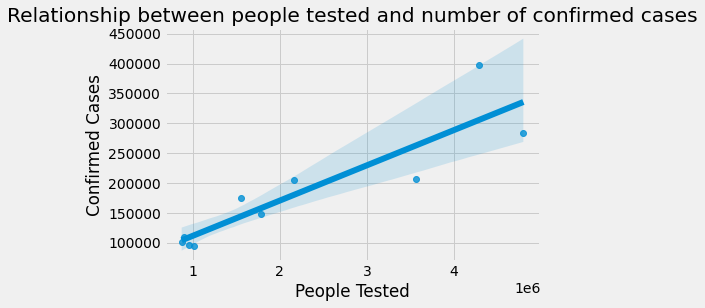

In [ ]:
#Nhập code ở đây:
us_top10cf = us_medical_data.sort_values('Confirmed', ascending = False).head(10)
us_top10cf = us_top10cf[['Confirmed', 'People_Tested']]
ax = sns.regplot(x = 'People_Tested', y = 'Confirmed', data = us_top10cf)
ax.set(xlabel = 'People Tested', YLABEL = 'Confirmed Cases')
ax.set_title('Relationship between people tested and number of confirmed cases')
